# Análisis de las carpetas de investigación aportados por la PGJ

Nota sobre los data: En la página donde viene la descripción de los data vienen dos links que supuestamente te llevan a los data, sin embargo ninguno de estos dos links sirve. Por lo que use los data que vienen en la sección de recursos que dice "Carpetas de Investigación de la FGJ". Quiero creer que estos data son los mismos o que al menos sirven para propósito de este ejercicio.  

In [157]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import xlrd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('carpetas_completa_marzo_2021.csv')

/home/meerkat/workspace/virtualenvs/datos_publicos/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (5,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.shape

(1188790, 19)

In [4]:
data.columns

Index(['ao_hechos', 'mes_hechos', 'fecha_hechos', 'ao_inicio', 'mes_inicio',
       'fecha_inicio', 'delito', 'fiscalia', 'agencia', 'unidad_investigacion',
       'categoria_delito', 'calle_hechos', 'calle_hechos2', 'colonia_hechos',
       'alcaldia_hechos', 'competencia', 'longitud', 'latitud', 'tempo'],
      dtype='object')

In [5]:
data.head(1)

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN


<font size=5> Describe general y limpieza básica de la información

Antes de iniciar con las preguntas verificare que en efecto esta base de data tenga relación con lo que dice en la descripción. Se supone que la base contiene información a partir de enero de 2016 y en la página hasta abajo dice que la última actualización a la base fue hecha el 26 de abril de 2021. No encontré ningúna descripción de las columnas en la página pero afortunadamente los nombres son bastante explicativos. Asumiré que fecha hechos corresponde a la fecha en que ocurrió el délito y que fecha_inicio corresponde a la fecha en que se registro el delito en la carpeta de investigación

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188790 entries, 0 to 1188789
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ao_hechos             1188356 non-null  float64
 1   mes_hechos            1188356 non-null  object 
 2   fecha_hechos          1188356 non-null  object 
 3   ao_inicio             1188790 non-null  int64  
 4   mes_inicio            1188790 non-null  object 
 5   fecha_inicio          1188790 non-null  object 
 6   delito                1188790 non-null  object 
 7   fiscalia              1188788 non-null  object 
 8   agencia               1188790 non-null  object 
 9   unidad_investigacion  1188563 non-null  object 
 10  categoria_delito      1188790 non-null  object 
 11  calle_hechos          1185772 non-null  object 
 12  calle_hechos2         465963 non-null   object 
 13  colonia_hechos        1140410 non-null  object 
 14  alcaldia_hechos       1185543 non-

Se eliminaron los nulos para la variable "fecha hechos" ya que representaban solo el 0.04% del total y será conveniente tener esta variable en formato datetime. Por el tiempo disponible no indagare en si era más mejor opción imputar los nulos con algún valor.

In [7]:
data = data.dropna(subset=['fecha_hechos'])

Como podemos ver algunos de los registros de la variable fecha_inicio se guardaron con el formato de fecha de excel y para otros si viene como datetime. Pasaremos todos a formato datetime de python.

In [8]:
data['fecha_inicio'].head(5), data['fecha_inicio'].tail(5)

(0    2016-02-01 00:25:44
 1    2016-02-01 00:52:37
 2    2016-02-01 01:33:26
 3    2016-02-01 02:09:11
 4    2016-02-01 02:16:49
 Name: fecha_inicio, dtype: object,
 1188785    1617234672
 1188786    1617234772
 1188787    1617234830
 1188788    1617234997
 1188789    1617235175
 Name: fecha_inicio, dtype: object)

In [9]:
# def from_excel_to_date(x):
#     result = datetime(*xlrd.xldate_as_tuple(x, 0)).strftime('%Y-%m-%d %H:%M:%S')
#     return result

In [10]:
# aux['fecha_inicio'] = aux['fecha_inicio'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S') if str(x).startswith('20') else from_excel_to_date(int(x)))

<font color='red'> Explicar porque se tiraron varios registros

In [11]:
data = data[data['fecha_inicio'].str.startswith('20').fillna(False)]

In [12]:
data['fecha_hechos'] = data['fecha_hechos'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))
data['fecha_inicio'] = data['fecha_inicio'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))

## ¿Qué pruebas identificarías para asegurar la calidad de estos data?

<font color='red'> Pending

## ¿Cuántos delitos registrados hay en la tabla? ¿Qué rango de tiempo consideran los data?

Inicialmente se tenían 1,188,790 registros, sin embargo con los registros que se han tirado por nulidad o errores en el formato, nos quedamos con 1,167,854. La tabla contiene investigaciones registradas a partir de 2016 hasta 2021 para delitos ocurridos desde 1906 (asumiendo que no hay error en la captura de los datos)

In [14]:
data.fecha_inicio.dt.year.value_counts()

2018    255294
2019    250146
2017    228318
2020    203997
2016    197786
2021     32313
Name: fecha_inicio, dtype: int64

In [15]:
data.shape, data.fecha_hechos.min()

((1167854, 19), Timestamp('1906-06-02 19:00:00'))

## ¿Cómo se distribuye el número de delitos en la CDMX? ¿Cuáles son los 5 delitos más frecuentes?

Los datos contienen delitos ocurridos en otros lugares que no son CDMX por lo que primero filtraremos las alcadias de CDMX. Una explicación a esto podría ser porque el delito se denunció en CDMX aunque haya ocurrido en otro lado o porque se mezclo información de otros estados en esta base. 

Supuesto: De acuerdo a la nota aclaratoria del catálogo estadístico de delito las categorias de los delitos fueron renombradas en febrero de 2020. Se revisaron algunos de los nombres del catálogo viejo y no se encontraron registros por lo que asumimos que la base descargada ya esta homologada de acuerdo a los nuevos nombres.

In [13]:
alcaldias_cdmx = list(data.alcaldia_hechos.value_counts().head(16).index)

In [14]:
data_cdmx = data[data.alcaldia_hechos.isin(alcaldias_cdmx)]

Primero solo por curiosidad observaremos la distribución de delitos por delegación y pues creo que si hace sentido. Tanto por lo "peligrosas" que son las delegaciones que tienen más reportes como por el hecho de que podría haber una mayor cultura de denuncia en estas delegaciones. 

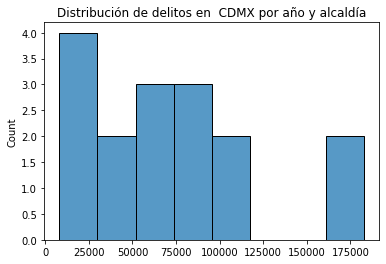

In [18]:
ax = sns.histplot(data_cdmx.groupby(['alcaldia_hechos']).size(), bins=8).set_title('Distribución de delitos en  CDMX por año y alcaldía')

In [19]:
data_cdmx.alcaldia_hechos.value_counts()

CUAUHTEMOC                182663
IZTAPALAPA                175680
GUSTAVO A MADERO          117052
BENITO JUAREZ              97719
ALVARO OBREGON             78913
COYOACAN                   77835
MIGUEL HIDALGO             76250
TLALPAN                    68293
VENUSTIANO CARRANZA        67341
AZCAPOTZALCO               56757
IZTACALCO                  48687
XOCHIMILCO                 36463
TLAHUAC                    28166
LA MAGDALENA CONTRERAS     18815
CUAJIMALPA DE MORELOS      17171
MILPA ALTA                  8098
Name: alcaldia_hechos, dtype: int64

Los 5 tipos de delitos más comunes en CDMX son: 

In [20]:
data_cdmx.categoria_delito.value_counts().head(5)

DELITO DE BAJO IMPACTO                                  900685
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA     66733
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                     61379
HECHO NO DELICTIVO                                       54230
ROBO A NEGOCIO CON VIOLENCIA                             19518
Name: categoria_delito, dtype: int64

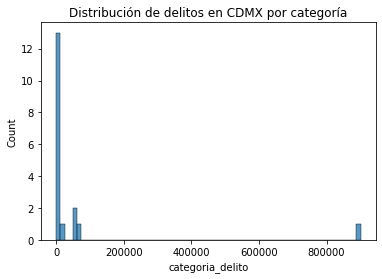

In [21]:
ax = sns.histplot(data_cdmx.categoria_delito.value_counts()).set_title('Distribución de delitos en CDMX por categoría')

Distribución de los delitos más comunes quitando "DELITO DE BAJO IMPACTO"

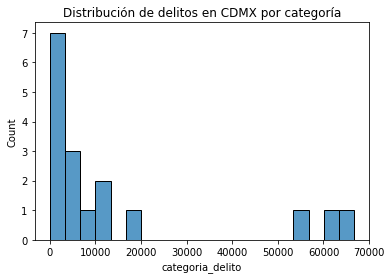

In [22]:
ax = sns.histplot(data_cdmx[data_cdmx.categoria_delito!='DELITO DE BAJO IMPACTO'].categoria_delito.value_counts(), bins=20).set_title('Distribución de delitos en CDMX por categoría')

## Identifica los delitos que van a la alza y a la baja en la CDMX en el último año, (ten cuidado con los delitos con pocas ocurrencias).

Seguiremos la recomendación de la pregunta y quitaremos los delitos con pocas ocurrencias antes de iniciar el análisis que en este caso son FEMINICIDIO y PLAGIO O SECUESTRO 

In [23]:
data_cdmx.categoria_delito.value_counts()

DELITO DE BAJO IMPACTO                                     900685
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA        66733
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                        61379
HECHO NO DELICTIVO                                          54230
ROBO A NEGOCIO CON VIOLENCIA                                19518
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                       11910
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA       10883
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO                7626
HOMICIDIO DOLOSO                                             6385
VIOLACIÓN                                                    5508
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA      3973
ROBO A CASA HABITACIÓN CON VIOLENCIA                         2980
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA      2189
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA                1134
ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA                      587
SECUESTRO 

In [24]:
categorias_preg4= list(data_cdmx.categoria_delito.value_counts().head(16).index)

Para identificar los delitos que van a la alza o a la baja compararemos el número de delitos del último año con respecto al número de delitos por categoria en el año previo.

In [25]:
ultimo_anio = data_cdmx[(data_cdmx.fecha_inicio>=(data_cdmx.fecha_inicio.max()  - timedelta(days=365)))
                        & (data_cdmx.categoria_delito.isin(categorias_preg4))]
anio_previo = data_cdmx[(data_cdmx.fecha_inicio<=(data_cdmx.fecha_inicio.max()  - timedelta(days=365)))
                        & (data_cdmx.fecha_inicio>=(data_cdmx.fecha_inicio.max()  - timedelta(days=730)))
                        & (data_cdmx.categoria_delito.isin(categorias_preg4))]

In [26]:
pregunta_4 = (ultimo_anio.categoria_delito.value_counts().rename('conteo_ultimo_anio').reset_index()
 .merge(anio_previo.categoria_delito.value_counts().rename('conteo_anio_previo').reset_index()))

pregunta_4['cambios_ultimo_anio'] = (pregunta_4['conteo_ultimo_anio'] - pregunta_4['conteo_anio_previo'])/pregunta_4['conteo_anio_previo']

Al comparar el último año con el año previo se observa que el número de delitos por categoria ha disminuido de acuerdo a los datos. Aunque sabemos que el último año podría estar subestimado por la pandemia ya que el confinamiento y el miedo a contagiarse pudo haber evitado que mucha gente presentara denuncias. 

In [27]:
pregunta_4

,index,conteo_ultimo_anio,conteo_anio_previo,cambios_ultimo_anio
0,DELITO DE BAJO IMPACTO,160396,195319,-0.178800
1,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,9888,14637,-0.324452
2,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,9375,12579,-0.254710
3,HECHO NO DELICTIVO,3688,4289,-0.140126
4,ROBO A NEGOCIO CON VIOLENCIA,3357,4924,-0.318237
5,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,2260,3276,-0.310134
6,VIOLACIÓN,1456,1538,-0.053316
7,HOMICIDIO DOLOSO,1159,1428,-0.188375
8,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,856,1281,-0.331772
9,ROBO A CASA HABITACIÓN CON VIOLENCIA,631,731,-0.136799


## ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?. ¿Por qué crees que sea esto?

### Alcaldia con más delitos

In [28]:
data_cdmx.alcaldia_hechos.value_counts().head(1) 

CUAUHTEMOC    182663
Name: alcaldia_hechos, dtype: int64

### Alcaldia con menos delitos

In [29]:
data_cdmx.alcaldia_hechos.value_counts().tail(1) 

MILPA ALTA    8098
Name: alcaldia_hechos, dtype: int64

A pesar de que Milpa Alta es mucho más grande que Cuauhtemoc, las oportunidades de trabajo y muchas otras actividades están concentradas alrededor en Cuauhtemoc y sus alrededores. Por lo mismo es una delegación con mayor flujo de personas y de dinero entonces podría estar ocurriendo lo siguiente (entre otras cosas seguramente):

1.- En efecto hay más delitos

2.- Es más fácil presentar una denuncia porque existen más lugares para hacerlo 

3.- La gente de Cuautemoc ve valor en presentar denuncias porque son mejor atendidas que las de Milpa Alta

## Dentro de cada alcaldía, cuáles son las tres colonias con más delitos

In [30]:
pregunta_6 = data_cdmx.groupby(['alcaldia_hechos', 'colonia_hechos']).size().rename('conteo_delitos').sort_values(ascending=False).reset_index()

In [31]:
for alcaldia in alcaldias_cdmx:
    print(f"\n{alcaldia}")
    print(pregunta_6[pregunta_6.alcaldia_hechos==alcaldia].head(3).colonia_hechos.values)


CUAUHTEMOC
['CENTRO' 'DOCTORES' 'ROMA NORTE']

IZTAPALAPA
['CENTRAL DE ABASTO' 'LOMAS DE SAN LORENZO'
 'DESARROLLO URBANO QUETZALCOATL']

GUSTAVO A MADERO
['LINDAVISTA' 'GUADALUPE TEPEYAC' 'SAN FELIPE DE JESÚS']

BENITO JUAREZ
['DEL VALLE CENTRO' 'NARVARTE' 'PORTALES SUR']

ALVARO OBREGON
['JARDINES DEL PEDREGAL' 'SAN ANGEL' 'ZEDEC SANTA FE']

COYOACAN
['PEDREGAL DE SANTO DOMINGO' 'AJUSCO' 'PEDREGAL DE SANTA URSULA']

MIGUEL HIDALGO
['POLANCO' 'ANAHUAC' 'LOMAS DE CHAPULTEPEC I SECCIÓN']

TLALPAN
['SAN ANDRÉS TOTOLTEPEC' 'HÉROES DE PADIERNA' 'TLALPAN CENTRO I']

VENUSTIANO CARRANZA
['JARDÍN BALBUENA' 'MOCTEZUMA 2A SECCIÓN' 'ZONA CENTRO']

AZCAPOTZALCO
['EL ROSARIO' 'INDUSTRIAL VALLEJO' 'CENTRO DE AZCAPOTZALCO']

IZTACALCO
['AGRÍCOLA ORIENTAL' 'AGRÍCOLA PANTITLAN' 'GRANJAS MÉXICO']

XOCHIMILCO
['SAN GREGORIO ATLAPULCO' 'SANTA CRUZ ACALPIXCA - PUEBLO'
 'SANTIAGO TEPALCATLALPAN']

TLAHUAC
['DEL MAR' 'MIGUEL HIDALGO' 'SAN FRANCISCO TLALTENCO']

LA MAGDALENA CONTRERAS
['SAN JERÓNIMO LÍDICE'

## ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas)?

<font color='red'> PENDING

Para simplificar el análisis tomaremos solo delitos ocurridos a partir de 2016 (que es el año en el que se empezaron a registrar los delitos)

In [32]:
data_preg7 = data_cdmx.groupby('fecha_hechos').size().rename('conteo_fecha').reset_index()

In [33]:
data_preg7= data_preg7[data_preg7.fecha_hechos.dt.year>2016]

In [34]:
data_preg7 = data_preg7.set_index(pd.DatetimeIndex(data_preg7['fecha_hechos'])).drop('fecha_hechos', axis=1)

In [1]:
#decompose_add = seasonal_decompose(data_preg7, extrapolate_trend= 'freq')

## ¿Cuáles son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás

Al igual que en la pregunta 4 quitamos las dos categorias  de delitos que tienen muy pocas observaciones.

En el siguiente mapa de calor que muestra la distribución del número  de delitos por categoría para cada alcaldía vemos lo siguiente:
* El "DELITO DE BAJO IMPACTO" es el más frecuente para todas las alcaldías. 
* El "DELITO DE BAJO IMPACTO" tiene un porcentaje mayor de ocurrencia respecto a otros delitos para las alcaldías Cuajimalpa de Morelos y La Magdalena Contreras mientras que para Iztacalco e Iztapalapa este porcentaje es menor
* El delito de "ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA" tiene un porcentaje mayor de ocurrencia respecto a otros delitos para las alcaldías de Iztapala e Iztacalco mientras que para Cuajimalpa de Morelos y La Magdalena Contreras este porcentaje es menor

In [72]:
a = data_cdmx[data_cdmx.categoria_delito.isin(categorias_preg4)].groupby(['alcaldia_hechos', 'categoria_delito']).size()

In [73]:
data_preg8 = (a / a.groupby(level=0).sum()).rename('porcentaje_ocurrencia').reset_index()

In [74]:
data_preg8_ = data_preg8.pivot(index='categoria_delito', columns='alcaldia_hechos', values='porcentaje_ocurrencia')

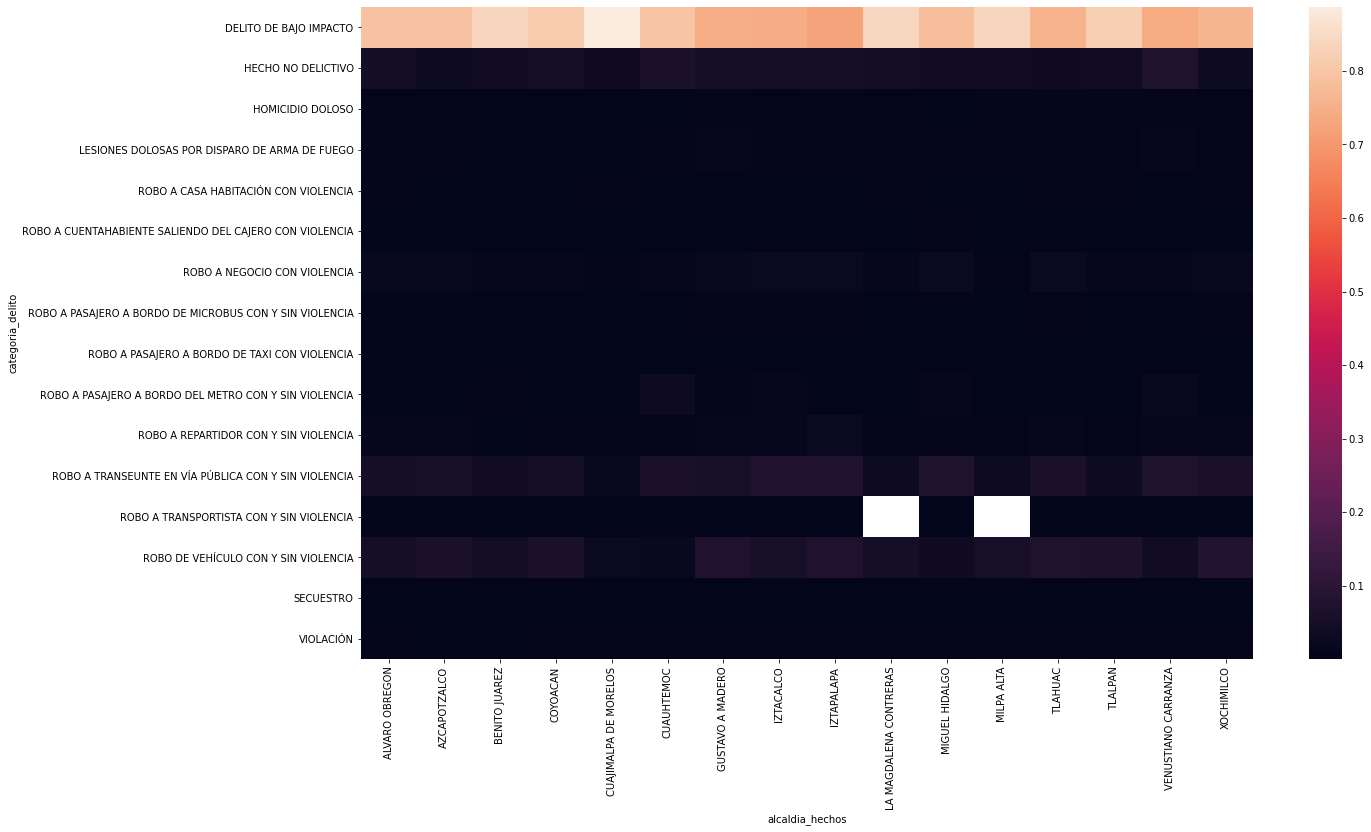

In [75]:
plt.figure(figsize=(20,12))
ax = sns.heatmap(data_preg8_)

## Calcula el número de homicidios dolosos por cada 100 mil habitantes anual para cada Área Geoestadística Básica (AGEB) del INEGI. 

Usaremos la librería de geopandas y los shapefiles del inegi para identificar a que AGEB pertenece cada delito usando su latitud y longitud. Una vez que tengamos identificados los AGEB, veremos cuantos delitos de homicidios dolosos ocurrieron por AGEB, lo compararemos contra el número de habitantes para ese AGEB y obtendremos el indicar de "número de homicidios dolosos por cada 100 mil habitantes"

In [15]:
import geopandas as gpd

/home/meerkat/workspace/virtualenvs/datos_publicos/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


Este shapefile fue obtenido de la siguiente liga https://www.inegi.org.mx/app/mapas/?t=0710000000000000&tg=3604#Busqueda_basica con el filtro para CDMX

In [179]:
ageb_sh = gpd.read_file('cdmx/09a.shp').to_crs(epsg=4326)

In [18]:
data_p9 = data_cdmx[data_cdmx.categoria_delito=='HOMICIDIO DOLOSO'].copy()
data_p9_geometry = gpd.GeoDataFrame(data_p9, geometry=gpd.points_from_xy(data_p9.longitud, data_p9.latitud)).set_crs(epsg=4326)
data_p9_ageb = gpd.sjoin(data_p9_geometry, ageb_sh, how='left')

In [45]:
homicidios_por_ageb = data_p9_ageb.groupby('cvegeo').size().rename('numero_homicidios_dolosos').reset_index()

Datos de población por ageb, obtenidos de esta liga: https://www.inegi.org.mx/sistemas/scitel/default?ev=7
Nota: Se uso el criterio de población total

In [46]:
poblacion = pd.read_csv('poblacion_por_ageb.txt', dtype={'ENTIDAD':str, 'MUN':str, 'LOC':str, 'AGEB': str})
poblacion['cvegeo'] = poblacion.apply(lambda x: x['ENTIDAD'] + x['MUN']+ x['LOC']+ x['AGEB'], axis=1)
poblacion_por_ageb = poblacion.groupby(['cvegeo'])['P_TOTAL'].sum().reset_index()

In [128]:
resp_p9 = homicidios_por_ageb.merge(poblacion_por_ageb, how='left')

In [129]:
resp_p9['P_TOTAL'].isnull().sum(), resp_p9.shape

(927, (1737, 3))

In [130]:
resp_p9.dropna(subset= ['P_TOTAL'], inplace=True)

Nota: Desafortunadamente para la base que encontre no viene la población para todos los agebs, pero en caso de tener los registros completos para todos los agebs este sería el procedimiento

In [141]:
resp_p9['indicador'] = resp_p9.apply(lambda x: 100000*x['numero_homicidios_dolosos']/x['P_TOTAL'] if x['P_TOTAL']>0 else 0, axis=1)

### Pinta un mapa con este indicador. Describe los resultados.

Nota: No se visualizan todos los agebs ya que como comente en el punto anterior no encontre la población para todos.

In [145]:
data_mapa = ageb_sh.set_index("cvegeo").join(resp_p9.set_index("cvegeo"))

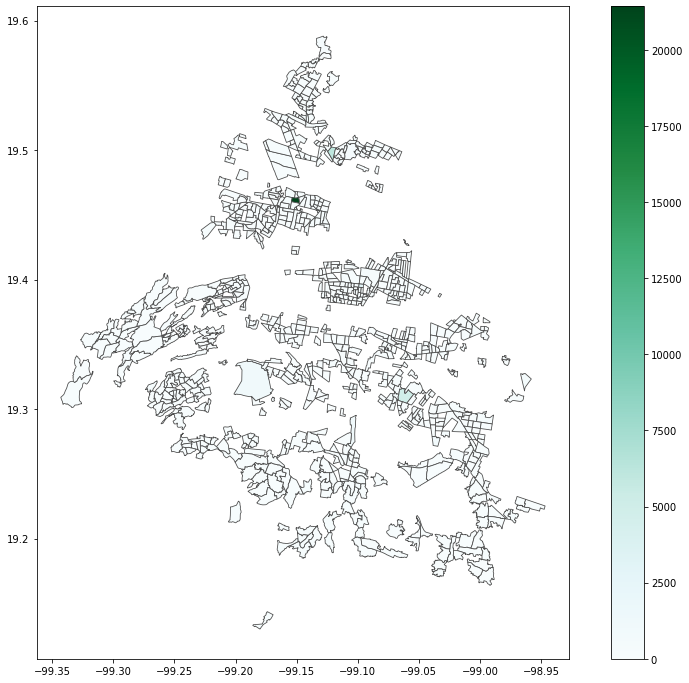

In [160]:
vmin, vmax = 0, data_mapa.indicador.max()
fig, ax = plt.subplots(1, figsize=(15, 12))
data_mapa.plot(column='indicador', ax=ax, cmap='BuGn', linewidth=0.8, edgecolor='0.3')
sm = plt.cm.ScalarMappable(cmap='BuGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

Tenemos casos en que la población es muy baja y hace que el indicador se vuelva muy grande. Esto hace que no veamos distinción en el mapa por los indicadores que son muy altos. Para ver un mapa un poco más ilustrativo filtraremos los indicadores que tienen una población mayor al percentil 10.

In [152]:
resp_p9.indicador.describe()

count      810.000000
mean        93.115890
std        807.801012
min          0.000000
25%         18.186833
50%         33.415021
75%         57.412716
max      21428.571429
Name: indicador, dtype: float64

In [158]:
resp_p9['P_TOTAL'].describe(percentiles=np.arange(0,1,0.1))

count      810.000000
mean      8689.965432
std       4753.150699
min          0.000000
0%           0.000000
10%       3267.800000
20%       4966.000000
30%       6025.600000
40%       7053.200000
50%       8035.000000
60%       9090.800000
70%      10357.200000
80%      11948.400000
90%      15161.000000
max      34304.000000
Name: P_TOTAL, dtype: float64

In [164]:
data_mapa_filtro = data_mapa[data_mapa.P_TOTAL>data_mapa.P_TOTAL.quantile(.1)]

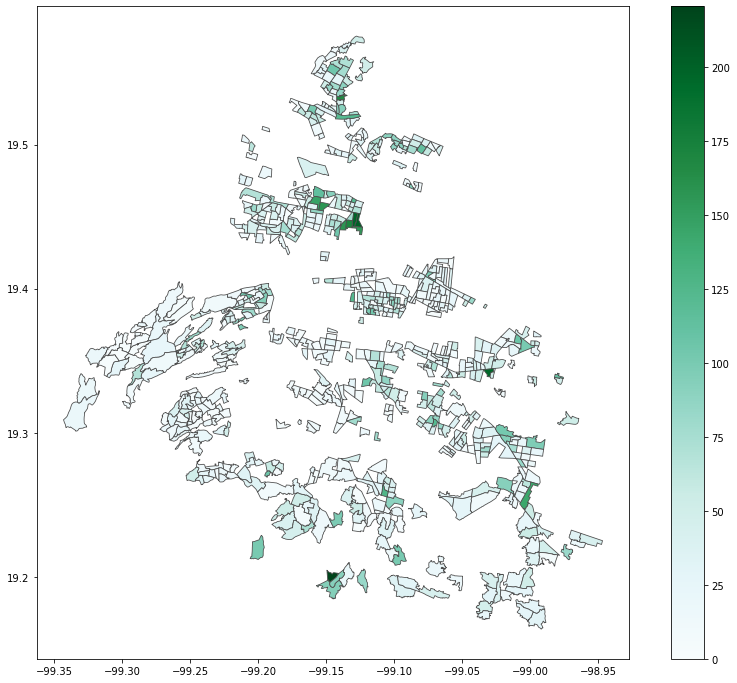

In [165]:
vmin, vmax = 0, data_mapa_filtro.indicador.max()
fig, ax = plt.subplots(1, figsize=(15, 12))
data_mapa_filtro.plot(column='indicador', ax=ax, cmap='BuGn', linewidth=0.8, edgecolor='0.3')
sm = plt.cm.ScalarMappable(cmap='BuGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

En este nuevo mapa vemos un poco mejor el valor que toma el indicador  por AGEB. A simple vista se observa que el indicador toma valores altos en la delegación Cuauhtemoc y en  la delegación Cuauhtemoc, cosa que ya sabiamos por los análisis previos. 

## ¿Cómo diseñarías un indicador que midiera el nivel “inseguridad”? 
Diséñalo al nivel de desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.)

El indicador de inseguridad por ageb comparará el número de delitos que no sean: DELITO DE BAJO IMPACTO y HECHO NO DELICTIVO contra el área del ageb en m2. Este indicador sera un estimador de la concentración de delitos por km2. 

El indicador se construira de la siguiente forma: **Número de delitos registrados en ageb/area en km2**

In [185]:
# Se paso el poligono a proyección cea y se transformo a km2:
#"La proyección cilíndrica de áreas equivalentes presenta el mundo como un rectángulo,
#mientras mantiene las áreas relativas en un mapa."
ageb_sh['area'] = ageb_sh['geometry'].to_crs({'proj':'cea'}) .map(lambda p: p.area/ 10**6)

In [189]:
data_p10 = data_cdmx[~data_cdmx.categoria_delito.isin(['DELITO DE BAJO IMPACTO', 'HECHO NO DELICTIVO'])].copy()
data_p10_geometry = gpd.GeoDataFrame(data_p10, geometry=gpd.points_from_xy(data_p10.longitud, data_p10.latitud)).set_crs(epsg=4326)
data_p10_ageb = gpd.sjoin(data_p10_geometry, ageb_sh, how='left')

In [190]:
delitos_por_ageb = data_p10_ageb.groupby('cvegeo').size().rename('numero_delitos').reset_index()

In [192]:
data_mapa_10 = ageb_sh.set_index("cvegeo").join(delitos_por_ageb.set_index("cvegeo"))

In [195]:
data_mapa_10['indicador'] = data_mapa_10['numero_delitos']/data_mapa_10['area']

De acuerdo a este indicador se observa un mayor nivel de inseguridad para los AGEBS marcados en verde fuerte, es decir las alcadias de Cuauhtemoc, Miguel y Hidalgo y Benito Juárez

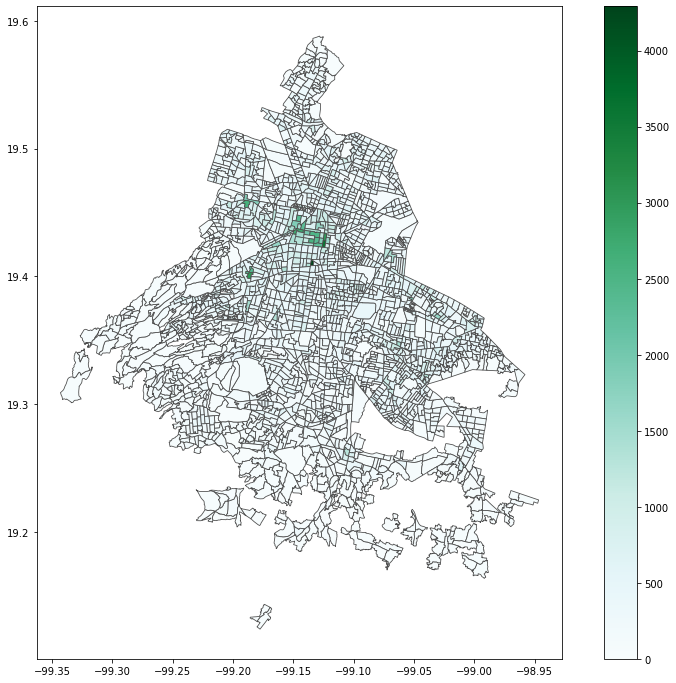

In [196]:
vmin, vmax = 0, data_mapa_10.indicador.max()
fig, ax = plt.subplots(1, figsize=(15, 12))
data_mapa_10.plot(column='indicador', ax=ax, cmap='BuGn', linewidth=0.8, edgecolor='0.3')
sm = plt.cm.ScalarMappable(cmap='BuGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)